# Overplotting: problems and solutions
by Giancarlo Ruffo, Università degli Studi di Torino

*Scatterplots* are extremely useful, expecially in scientific visualisation, to make sense of data. They turn out to be pretty good when your dataset is big. It is usually the first step of an iterative visualisation process that help to detect some signal of hidden patterns that require some further analysis to verify if such a structure in our dataset really exist.

As many great tools that we commonly use, scatterplots also suffer of some issue. In particular, when the dataset is too big, overplotting can hide some existing pattern: too many dots in the same area are just drawn covering the others, and your graphic becames unreadable. To be fair, scatterplots are not the only charts that may suffer of overplotting issues, but however this problem is very common with this tipology of charting, so you can find a lot of great tutorial on-line to understand how overplotting can be reduced with your own preferred language or library. For example, many of the ideas we used for creating this notebook have been inspired from [#134 How to avoid overplotting with python](https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/). 

If you are looking for a deeper methodological explanation, I suggest reading the following excellent book: *Stephen Few, Now You See It Analytics Press, 2009, in particular the *Analytical Techniques and Practices* Chapter has a section dedicated to *Over-plotting reduction*.

In [9]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# we also use seaborn here, a library based on matplotlib;
# it provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
plt.style.use('seaborn')

In [10]:
# Dataset: we create three big groups of data, clustered by construction
df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
df=df.append(tmp1).append(tmp2)

Text(0.0, 1.0, 'Overplotting example')

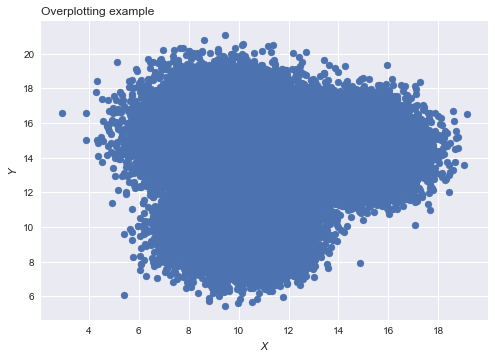

In [11]:
# plot - we use scatter() method here
plt.scatter( df.x, df.y, marker='o')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting example', loc='left')
plt.show()

It looks like a large spot. A trained eye can suspect there is something behind there, but you are biased because you know that that three different groups were created on purpose. Let's apply some tricks here and there.

## Reducing size and changing shape

One of the reasons of overplotting is that one dot is merged to other dots just because they are to close each other in 2D grid. We can smooth this effect reducing each dot size, so that probability of overlap is just reduced.

Text(0.0, 1.0, 'Overplotting: reducing size')

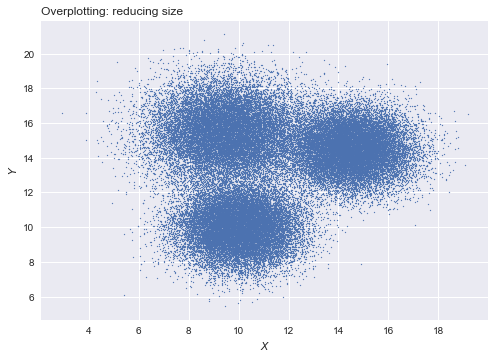

In [12]:
# using `s` argument to reduce size
plt.scatter( df.x, df.y, marker='o', s=1)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: reducing size', loc='left')
plt.show()

Things are much better now. One may wonder if it is just using circles instead of other markers' shapes that brings to overplotting.

Text(0.0, 1.0, 'Overplotting: changing shape')

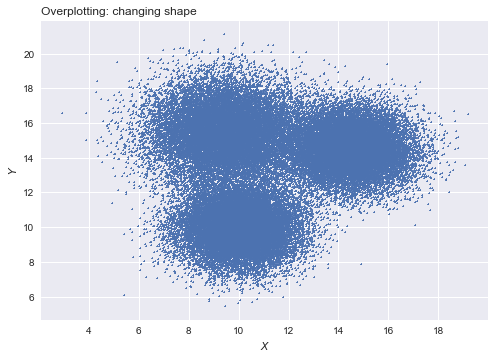

In [13]:
# Plot with small marker size
plt.scatter( df.x, df.y, marker='+', s=1)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: changing shape', loc='left')
plt.show()

Your eyes can judge which solution is better. If you opt for circles, you may want to try some other tricks, like for example, removing circle's fill color. Argument `facecolor` may come to assist you.

Text(0.0, 1.0, 'Overplotting: removing fill color')

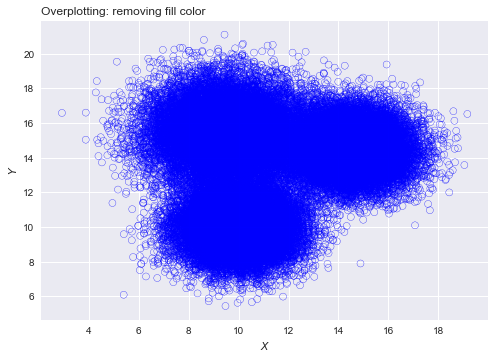

In [14]:
plt.scatter( df.x, df.y, marker='o', facecolors='none', edgecolors='b')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: removing fill color', loc='left')
plt.show()

It is likely that you have still too many dots here: even if we remove fill colors, we still have to many dots so close to each other that many circles' borders fill other circles' areas. Can you try to combine all the effects you have seen so far to let emerge our regularities more clearly? If you do, just add a cell below and make your experiments.

# Using transparency

Increasing transparency setting `alpha` channel properly, emphasizes differences in density in our three groups. Here you can mantain circles to represent our points, and you can also reduce the circle sizes to further reduce overplotting issues. Changing the color can also helps: points in low density areas are barely visible because of low transparency, and using a more contrasting hue can improve slightly the final quality. 

Text(0.0, 1.0, 'Overplotting: setting transparency')

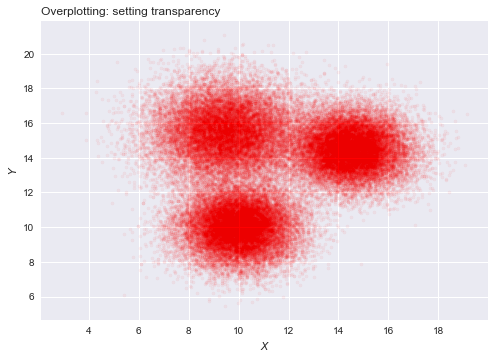

In [15]:
plt.scatter( df.x, df.y, marker='o', alpha=0.05, s=10, color="r")
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: setting transparency', loc='left')
plt.show()

One of the most important lesson you have probably learned so far is that there is no technique that is clearly superior than the others: sometimes you have to iterate exhaustively your visualisation experiments to make sense of your noisy data. Digging deeper and deeper may lead you to have an intuition of some hidden patterns, but the border with *torturing* your data to unveil what you expect to see is a very thin line. Moreover, Gestalt effects are one step away, you can start suffer of *data hallucination* ore being just another victim of pareidolia: remember that **the mind can perceive a familiar pattern of something where none actually exists**! To avoid this, you have a lot of quantitative tools that can assist your rational reasoning when it starts to be too much tempted to your intuition and imagination. Just remember that rationality and intuition, even if they often agree to disagree, are your best friends, but none of them should be left too much behind. 

Luckily enough, you can embed some quantitative and analytical tools to your charts: if you have the intuition that point's density is stronger at the core of each groups and it decreases while you move radially away from the center, than you can stop tricking with transparencies, sizes and shapes, and measure **densities** directly. Luckily enough, there are a lot of methods you can use to leave much of the work to python and to your libraries.

## Density plots

Histograms are vary popular when it comes to plot densities. Here we have a bivariate distributions because we can count our $(x,y)$ points for each cell in a grid, after we have set a numer of horizontal and vertical bins; in fact, the main idea is to transform the entire chart area to a grid made of many smaller 2d areas, whose shape can be a square or an hexagon (hexbin), and to count the number of points within that given areas. How do you represent values in our 2d grid? Remember that there are many different pre-attentive attributes that can be used to represent other dimensions: color coding is one of these. Using the common *heatmap* mataphor, you can can assign different colors to density values, e.g., using less saturated hues for low densities, and more saturated ones for high densities. 

Finally you can draw your plots with `hist2d()` and `hexbin()` methods if you want to use squares or hexagon based grid. Passing a given set of a color gradients to the `cmap` argument, you can visualise densities as well.

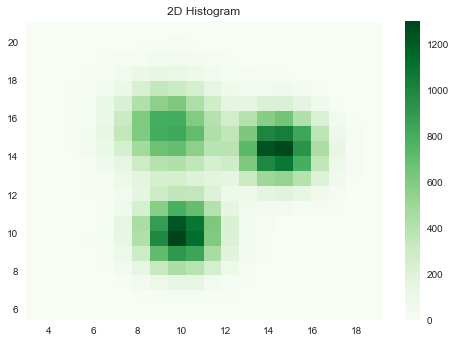

In [40]:
nbins = 20
plt.title('2D Histogram')
plt.hist2d(df.x, df.y, bins=nbins, cmap="Greens")
plt.colorbar() # adding a colorbar at the side as a legend may be extremely useful to the viewer
plt.show()

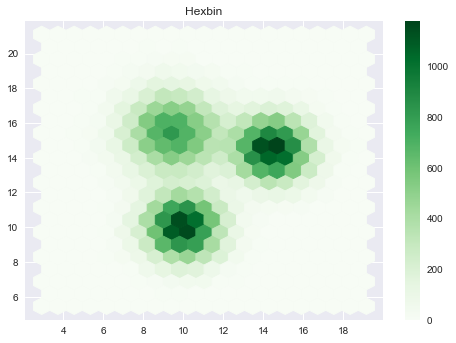

In [39]:
plt.title('Hexbin')
plt.hexbin(df.x, df.y, gridsize=nbins, cmap="Greens")
plt.colorbar()
plt.show()

One of the main issues with using histograms, is that we have to change the number of bins if we want a better resolution to determine the distribution shape. If you go back to notebook `matplotlib04`, we temporarily dealt with the histograms resolution issue using *area charts* and *stacked area charts*. However, density plots are the 'official solution' to that famouse histograms limitations because of the adoption of the *kernel smoother* function. 

A *Density Plot* can be introduced as an extension of histograms, showing the distribution of data over a continuous interval or time period. They use the so called *kernel smoother* (no surprise that they are also called *Kernel Density Plots*), namely a statistical technique that estimates a function with real values $f: \mathbb{R}^p \to \mathbb{R}$. The value is defined by the *kernel* such that closer points are given higher weights. The outcomes is a smooth function, whose level of smoothness is set by a single parameter $p$. In data visualisation, this parameter is set very low ($p < 3$), to keep the dimension of the predictor small, that allows for smoother passages from one discrete value to another. This makes also emerge quite clearly the peaks of a Density Plot where values are concentrated over the interval.

Density plots are widely adopted to avoid overplotting. The main idea is to transform the entire chart area to a grid made of many smaller 2d areas, whose shape can be a square or an hexagon (hexbin), and to count the number of points within that given areas. Then you calculate 2D *kernel density estimate (kde)* and represent it with contours. Now you have many different alternatives. One is to calculate your gaussian kde distribution and then to plot it in a grid. Another is use the seaborn `kdeplot()` method, that fits and plots a univariate or bivariate kernel density estimate. 

In our example we need to calculate a bivariate kernel density estimate (we have $x$ and $y$ values). If you just call the `kdeplot()` method, you will plot *contour lines* representing *kde* distributions. 

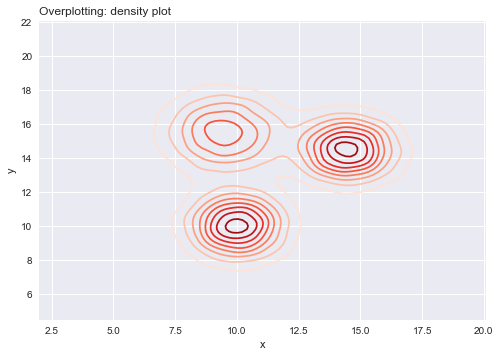

In [42]:
sns.kdeplot(df.x, df.y, cmap="Reds")
plt.title('Overplotting: density plot', loc='left')
plt.show()

Remember that you can always have more plots in the same figure. Hence, we can have our scatteplots with contours, that could help our eye to better locate higher density areas.

Text(0.0, 1.0, 'Overplotting: density plot')

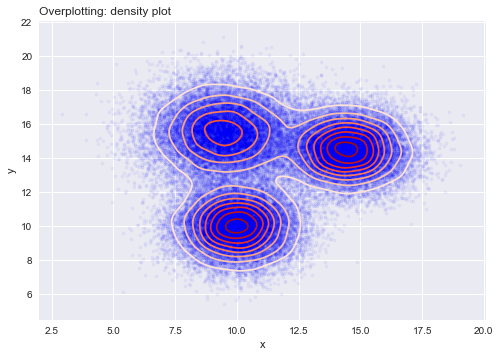

In [25]:
sns.kdeplot(df.x, df.y, cmap="Reds")
plt.scatter( df.x, df.y, marker='o', alpha=0.05, s=10, color="b")
plt.title('Overplotting: transparency and contours', loc='left')
plt.show()

If you want to draw it with filled contours, use `shade` argument and set it to `True`. Check official seaborn documentation form more information on [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

Text(0.0, 1.0, 'Overplotting: density plot')

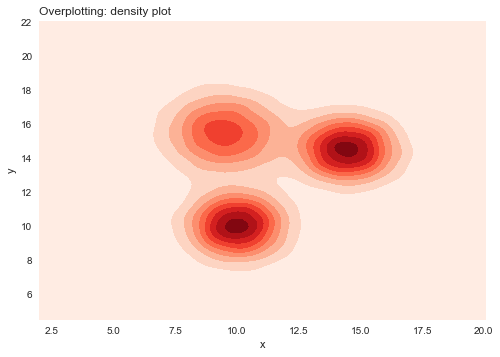

In [16]:
sns.kdeplot(df.x, df.y, cmap="Reds", shade=True)
plt.title('Overplotting: density plot with filled contours', loc='left')
plt.show()

You can add much more quantitative information on you kde plotting marginal distributions. You can draw this quite easily with the seaborn `jointplot()` method, setting the `kind` argument to `kde`. Check official seaborn documentation form more information on [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

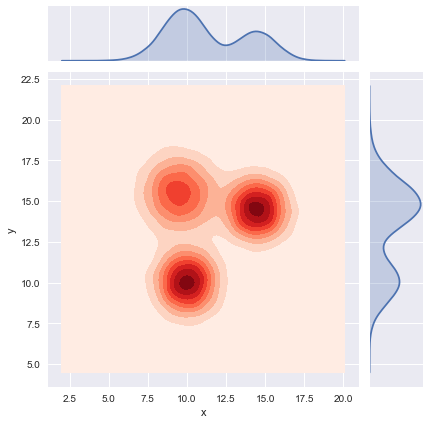

In [37]:
# 2D density + marginal distribution:
sns.jointplot(x=df.x, y=df.y, kind='kde', cmap="Reds")
plt.show()

Some data scientists suggest charting kde values in a 3d graph, that means that you can use the z-axis to plot the density estimate. Unfortunately, `kdeplot()` does not offer this option, and that means that you should create your own 2d grid for $x$ and $y$ values, and then calculate the kde gaussian distribution to fill values in the $z$ dimension. You can look for your own solution or try some pre boiled code; for instance, you can check the [Python Graph Gallery](https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/) for very good suggestions. Personally, I do not recommend using 3d representations when there are so many good 2d solutions, even if 3d is aesthetically catchy, expecially beacuse when you introduce a graphical perspective, and you are not an artist like Piero della Francesca, the viewer will be subject to many perception biases that could discourage fair comparisons between different subsets of your data. This is the reason why we do not report here any example of 3d density plots.

## Solutions based on loss of information and adding noise

You have a vast gallery of solutions that can help your intuition to find patterns that overplotting may by hiding to you, and that can also satisfy your rational mind with statistical techniques adding significant and quantitative information to your plots. However, under some circumstances you may opt for some drastic, but still effective, measures. When your dataset is too big, overplotting is not the only issue you will be forced to deal with. Sometimes your algorithms and your limited computational power will make your calculation and even the rendering to slow. You may want to get a **sample** of your data, and visualize it. Data sampling is a powerful tool that must be used with care. Here we want to give just an example, but it is better to refresh your statistics classes before deciding to adopt sampling everytime you need to scale down your dataset size. There are so many biases in processes such as data collection, that you need to adopt different techniques to different datasets. 

In our example, we are quite lucky. Our three groups of data points were artificially created using three normal distribution generative function. That means that a random sampling can be performed quite safely and no one will be hurt. If you have a stocastics heart beating, you an also repeat the sampling process more than once to see if results change consistently. 

`pandas` provides the `sample` method that will take randomly from the given dataframe a number of lines you pass as an argument.

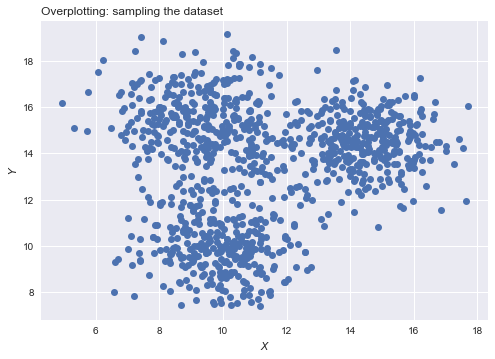

In [45]:
df_sample=df.sample(1000)

plt.plot( df_sample.x, df_sample.y, linestyle='', marker='o')
 
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Overplotting: sampling the dataset', loc='left')
plt.show()

You lose resolution, but it is likely that you have a clearer picture in mind. You can also combine many techniques. In the following example, we are using scatter plots of our sample, transparency, and marginal plots. Can you create your own mixing? Which is your favorite composition?

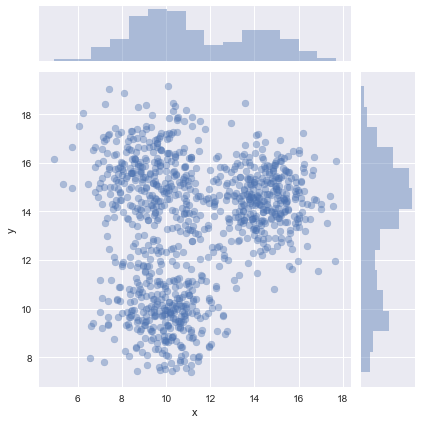

In [60]:
# 2D density + marginal distribution:
sns.jointplot(df_sample.x, df_sample.y, alpha=0.4)
plt.show()

You can also jitter the data so that underlying information can be viewed making it easier to see patterns.
In practical terms, **jittering** adds additional (pretty limited) noise to your data. Hence, again, cautions must be taken, because you can confuse your audience and lead to data misinterpretation. The most common suggestion is to jitter in-house fairly regularly but only sparingly in graphics that are meant to be shared with clients, the public, or policy makers. Of course you can write disclaimers, but you are aware that clients, the public and policy makers do not read disclaimers, right?

To better explain jittering, we get rid of the old dataframe (you can check what happens when you jitter that dataset on your own), to introduce the famous (or infamous) *iris* dataset. We will use extensively the iris dataset in many of the following notebooks. In particular it will turn out that is the perfect dataset to give an overview of the many possibilities we have to graphically represent multivariate data. For now, just consider that we have three species of irises (namely, *setosa*, *versicolor*, and *viriginica*, that we can deal as a categorical information), and each individual iris that has been collected, was labeled as a member of one of these species, and represented by means of a vector space made of four attributes: *petal length*, *petal width*, *sepal length* and *sepal width*. 

This dataset is so common that it comes with many libraries. You can use `seaborn` method `load_dataset()` to import the `iris` dataset into a dataframe. Once the dataframe is ready, you can plot the distribution of one of the given attributes for each iris species.

In [65]:
iris = sns.load_dataset('iris')

In [66]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


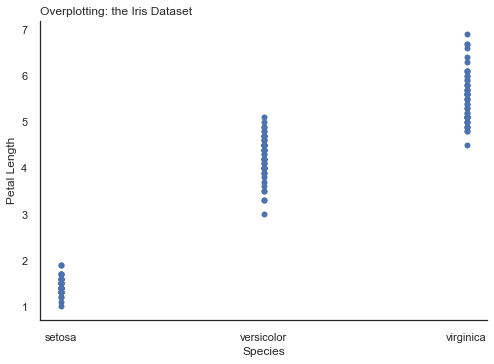

In [76]:
sns.set(style="white", color_codes=True) # another seaborn style that just works well with this example

plt.plot( iris.species, iris.petal_length, linestyle='', marker='o')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Overplotting: the Iris Dataset', loc='left')
sns.despine() # increase your data-ink ratio: this method remove the top and right aexes from the plot
plt.show()

Overplotting again! This tells you almost nothing about the petal_lenght distribution along the $y$ axis. Of course you can use a number of other plots (e.g., box and whisker plots could work just fine here). However, you can try jittering to make sense of your data. Jitting can slightly separate points that occur close together, and you can also have dots colored according categories in order to have a better idea of the relationship between a categorial variable (species), and a continuous variable (petal_length).

Pass your noise value to argument `jitter` in the seaborn `stripplot()` method and see the differences. Please note that you can simply pass value `True` to `jitter` argument to let `seaborn` decide the best noise default for you. 

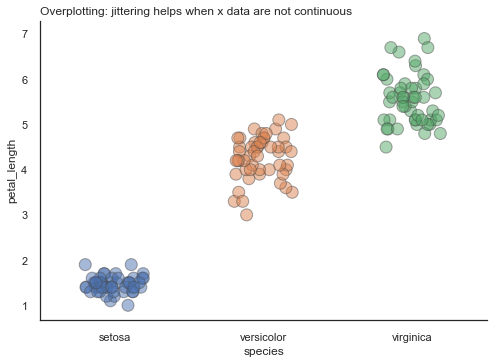

In [91]:
sns.stripplot(iris.species, iris.petal_length, jitter=0.2, size=12, linewidth=1, alpha=0.5)
plt.title('Overplotting: jittering helps when x data are not continuous', loc='left')
sns.despine()
plt.show()

Make your own design adjustment to this plot, also exploring the other arguments you can pass to `stripplot()` method. Please, observe that the `stripplot()` method has been engineered to draw a scatterplot where one variable is categorical. In other words, it can be used in place of other `matplotlib` methods as `plot()` or `scatter()` in this particular case. If you run it Check the official searbon documentation on [stripplot() method](https://seaborn.pydata.org/generated/seaborn.stripplot.html) for tuning your plot according to your needs.

What to do when you have to jitter your data and both variables are numerical? You can try to call the `stripplot()` method anyhow: one variable's values will be discretized in many small intervals, and you will be probably need to set up your *bins* properly. Otherwise, you can just code your own ways to add a small disturbance  along the x and/or the y coordinate, and see the results. 

Now it is time for you to play a little bit with techniques acquired so far. Enjoy!